<img src="https://electronaut.info/wp-content/uploads/2017/05/Tubescape_jupyter2.jpg">

<h1><font color = b30000>TUBE DATA MATCHER for uTRACER FILES</font></h1><h5>Anode current for a sweep of grid voltages  when anode voltage = constant</h5>


# STEP 1 — Import and process tube data, build dataframe.

In [1]:
from ElectronauTracer_Importer import *
df.head()


Please enter the path to the folder containing the uTracer files: /Users/rrmc/Desktop/burnedintubes

What type of tubes are these? 5749

— — — — — 

Data from 63 tubes of type 5749 was successfully read.
A dataframe containing all 63 tubes was successfully created.


,tube_ID,tube_type,anode_voltage,Bias_2,Bias_6,Bias_10,Bias_14,Bias_18,Bias_22,Bias_26,Bias_30,Bias_34,Bias_38,Bias_42,Bias_46,Bias_50
0,356,5749,325,77.778,47.335,30.168,22.012,16.393,12.337,9.368,7.198,5.658,4.611,3.897,3.394,3.007
1,364,5749,325,78.269,47.972,30.718,22.443,16.722,12.537,9.49,7.301,5.76,4.715,3.994,3.433,2.968
2,366,5749,325,67.519,40.803,25.132,18.204,13.541,10.067,7.483,5.589,4.224,3.3,2.709,2.323,2.033
3,377,5749,325,83.153,52.089,34.211,25.271,19.126,14.664,11.437,9.077,7.391,6.182,5.299,4.613,4.043
4,387,5749,325,76.167,45.68,28.812,21.154,15.813,11.907,9.048,6.974,5.523,4.541,3.851,3.321,2.896



# STEP 2: Show the statistics of the tube data set

In [2]:
# For some reason, .describe is requiring .astype(float) in order to show the stats.
df_stats = df.astype(float).describe()
df_stats.loc[:, 'tube_type'] = df_stats.loc[:, 'tube_type'].astype(int)
df_stats.loc[:, 'tube_ID'] = df_stats.loc[:, 'tube_ID'].astype(int)
df_stats

,tube_ID,tube_type,anode_voltage,Bias_2,Bias_6,Bias_10,Bias_14,Bias_18,Bias_22,Bias_26,Bias_30,Bias_34,Bias_38,Bias_42,Bias_46,Bias_50
count,63,63,63.0,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,599,5749,325.0,69.768286,41.715873,25.935048,18.650159,13.786270,10.241032,7.650603,5.774238,4.447063,3.539524,2.916413,2.465048,2.123222
std,145,0,0.0,8.408693,6.131187,4.765722,3.825158,3.081033,2.517737,2.086078,1.755510,1.500698,1.301283,1.137565,0.998755,0.879118
min,356,5749,325.0,52.903000,29.836000,16.593000,10.991000,7.715000,5.423000,3.796000,2.628000,1.744000,1.192000,0.887000,0.710000,0.595000
25%,480,5749,325.0,63.000500,37.449000,22.657000,15.844000,11.385000,8.242000,6.057000,4.485000,3.342500,2.566500,2.061500,1.739000,1.488000
50%,583,5749,325.0,68.350000,39.813000,24.953000,18.099000,13.490000,10.067000,7.462000,5.584000,4.253000,3.450000,2.897000,2.497000,2.149000
75%,750,5749,325.0,76.141500,46.680000,29.839500,21.820500,16.237000,12.142500,9.126500,7.007000,5.529500,4.485000,3.626500,2.969000,2.517000
max,799,5749,325.0,89.376000,54.870000,35.920000,26.696000,20.452000,15.868000,12.492000,9.962000,8.086000,6.721000,5.731000,4.969000,4.335000


# STEP 3: Plot a graph of all tubes


In [3]:
# Plot a line graph of all tubes

from bokeh.plotting import figure, output_file, show

output_file("Tube_Batch_Statistics.html")

# Configure the size, title, etc.
p = figure(plot_width=1000, plot_height=750, title="Plate Current as a function of Grid Voltage")
p.title.text_color = "black"

# Make a list for the x_values by chopping off all the "bias_" column name prefixes and converting to ints
temp_columns = list(df_stats.columns)
stats_columns = []
x_values = [int(i[5:]) for i in temp_columns if i.startswith('Bias_') == True]        

# Add all rows of tubes
for i in range(len(df.index)):
    row = df.iloc[i]
    row = list(row)
    row = row[3:]
    p.line(x_values, row, line_width=2)

# Set axis labels
p.xaxis.axis_label = "Grid Voltage (V)"
p.xaxis.axis_label_text_color = "#aa6666"
p.yaxis.axis_label = "Plate Current (mA)"

# Set grid lines
p.ygrid.minor_grid_line_color = 'navy'
p.ygrid.minor_grid_line_alpha = 0.2
p.xgrid.minor_grid_line_color = 'navy'
p.xgrid.minor_grid_line_alpha = 0.2

# Set background color
p.background_fill_color = "beige"
p.background_fill_alpha = 0.5

# Show the plot
show(p)

# STEP 4: Show the distribution of a single bias voltage


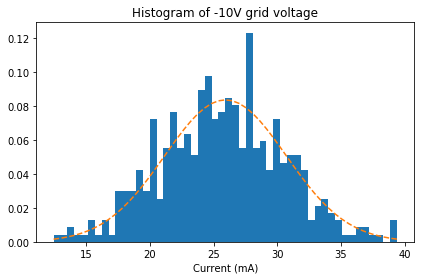

In [4]:
# Histogram of a single column

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np

sigma = df_stats.iat[2, 5]
mu = df_stats.iat[1, 5]
x = mu + sigma  * np.random.randn(437)
num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, normed=1)

# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
ax.plot(bins, y, '--')
ax.set_xlabel('Current (mA)')
# ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of -10V grid voltage')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

# STEP 5: Calculate the differences between all tubes

In [5]:
from ipywidgets import FloatProgress
from IPython.display import display
import time

start_time = time.time() 

def build_difference_df(df, df_stats):
    
    # Display a progress bar
    build_diff_progress_bar = FloatProgress(min=0, max=100)
    display(build_diff_progress_bar)
       
    # Make a list of all the columns in the dataframe
    cols = list(df.columns)
    
    # Make a list of just the bias columns (*** Should re-write this as a list comprehension)    
#     bias_list2 = [bias_list2.append(i) for i in cols if i.startswith('Bias_') == True]

    bias_list = []
    for i in cols:
        if i.startswith('Bias_') == True:
            bias_list.append(i)
    
    
    # Make an empty list to hold the calculated values, to be used to build the difference dataframe
    diff_squared_list = []
    
    # Iterate through the index of tubes in the master dataframe to select a reference tube
    for each_ref_tube in df.index:
        
        # Get the next reference tube data, as a series
        ref_tube = df.iloc[each_ref_tube]
        ref_tube_ID = ref_tube.tube_ID

        # Iterate through the index of tubes in the master dataframe to select a match tube
        for each_match_tube in df.index:
            
            # Get the next tube data to be compared, as a series
            match_tube = df.iloc[each_match_tube]
            match_tube_ID = match_tube.tube_ID
            
            # Dictionary container to hold the difference variables for each tube
            temp_dict = {}
            
            # Compute the squares of the differences in each current measurement
            error_sum = 0
            for bias in enumerate(bias_list):
                mismatch = ((float(match_tube.loc[bias[1]]) - float(ref_tube.loc[bias[1]]))**2)
                temp_dict[bias[1]] = mismatch
                error_sum = error_sum + mismatch

            # Add other relevant key/value pairs to the dictionary  
            temp_dict['ref_tube_ID'] = ref_tube_ID
            temp_dict['match_tube_ID'] = match_tube_ID
            temp_dict['error_sum'] = error_sum

            # Append the tube's calculated values to the diff_squared_list
            diff_squared_list.append(temp_dict)
            
            # Update the progress bar
            build_diff_progress_bar.value += 1

    
    # Make an ordered list for the columns of the new difference dataframe
    new_cols_to_add = ['ref_tube_ID', 'match_tube_ID', 'error_sum']
    df_dif_cols = new_cols_to_add + bias_list
    df_dif = pd.DataFrame(diff_squared_list, columns = df_dif_cols)

    return df_dif
    
    
df_dif = build_difference_df(df, df_stats)

# Produce a brief report:
total_rows = len(df_dif)
total_columns = len(df_dif.columns)
total_datapoints = total_rows * total_columns
stop_time = time.time()
elapsed_time = stop_time - start_time
print("It took", round(elapsed_time, 2), "seconds to calculate", 
      total_datapoints, "values, resulting in", len(df_dif), "rows.")

# Display the head of the difference dataframe
df_dif.head()

FloatProgress(value=0.0)

It took 3.61 seconds to calculate 63504 values, resulting in 3969 rows.


,ref_tube_ID,match_tube_ID,error_sum,Bias_2,Bias_6,Bias_10,Bias_14,Bias_18,Bias_22,Bias_26,Bias_30,Bias_34,Bias_38,Bias_42,Bias_46,Bias_50
0,356,356,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,356,364,1.342516,0.241081,0.405769,0.302500,0.185761,0.108241,0.040000,0.014884,0.010609,0.010404,0.010816,0.009409,0.001521,0.001521
2,356,366,214.487313,105.247081,42.667024,25.361296,14.500864,8.133904,5.152900,3.553225,2.588881,2.056356,1.718721,1.411344,1.147041,0.948676
3,356,377,109.149882,28.890625,22.600516,16.345849,10.621081,7.469289,5.414929,4.280761,3.530641,3.003289,2.468041,1.965604,1.485961,1.073296
4,356,387,8.626013,2.595321,2.739025,1.838736,0.736164,0.336400,0.184900,0.102400,0.050176,0.018225,0.004900,0.002116,0.005329,0.012321


# STEP 6: Find the best matches for a particular tube_ID

In [ ]:
# This function requires the tube_to_match and tube_set_size variable to be set manually, below.

def find_best_set_for_chosen_tube_ID(tube_to_match, tube_set_size):
    tube_to_match = str(tube_to_match)
    
    # Create a new dataframe showing only tube_set_size number of nearest matches to the chosen tube_to_match
    df_tube_set = df_dif[(df_dif.ref_tube_ID == tube_to_match)].sort_values('error_sum').head(tube_set_size)
    
    return df_tube_set

tube_to_match = 460
tube_set_size = 2
df_tube_set = find_best_set_for_chosen_tube_ID(tube_to_match, tube_set_size)
df_tube_set.head(tube_set_size)


# STEP 7:  Build a dataframe of the best matched sets in order

In [6]:
# math lib used for generating ordinal strings; i.e. ['1st', '2nd', '3rd'] etc.
import math

# Make a local version of df_dif that can be butchered
df_dif_copy = df_dif.copy()

def ask_tube_set_size():
    
    # Ask the user to enter the set size
    tube_set_size = input("Please enter the number of tubes per matched set:")
    
    # Build a list of tube names for the tube set size
    tube_sets_columns = ['Tube_' + str(1 + i) for i in range(int(tube_set_size))]    
    
    return tube_set_size, tube_sets_columns 


def find_best_set_for_chosen_tube_ID(df_dif_copy, tube_to_match, tube_set_size, tube_sets_columns):
    tube_to_match = str(tube_to_match)
        
    # Create a new dataframe showing only tube_set_size number of nearest matches to the chosen tube_to_match
    df_tube_set = df_dif_copy[(df_dif_copy.ref_tube_ID == tube_to_match)].sort_values('error_sum').head(int(tube_set_size))
        
    # Create the dictionary of the tubes in the set and the total score of the set
    tube_set_list = list(df_tube_set.match_tube_ID)
    tube_set_dict = dict(zip(tube_sets_columns, tube_set_list))   
    tube_set_score = df_tube_set.error_sum.sum()
    tube_set_dict.update({'tube_set_score':tube_set_score})

    return tube_set_dict


def find_best_set(df_dif_copy, tube_set_size, tube_sets_columns):
    
    # Make an empty list to hold the tube sets and their scores
    tube_sets_and_scores_list = []
    temp_dict = {}
    
    if 'tube_set_score' in tube_sets_columns:
        tube_sets_columns.remove('tube_set_score')

    for i in df_dif_copy.ref_tube_ID.unique():
        temp_dict = find_best_set_for_chosen_tube_ID(df_dif_copy, i, tube_set_size, tube_sets_columns)
        tube_sets_and_scores_list.append(temp_dict)

    # Add 'tube_set_score' column name at the front of the list
    if 'tube_set_score' not in tube_sets_columns: 
        tube_sets_columns.insert(0, 'tube_set_score')    
    
    # Create a dataframe for the tube sets called df_tube_sets 
    df_tube_sets = pd.DataFrame(tube_sets_and_scores_list, columns=tube_sets_columns)
    
    # Sort the tube_set_score column, take the top row (with the lowest score) as a new df 
    df_best_set_temp = df_tube_sets.sort_values('tube_set_score').head(1)
        
    return df_best_set_temp
 
    
# Start a timer
start_time = time.time()   
    
# Make an empty dataframe to hold all the sets and their scores
df_best_tube_sets = pd.DataFrame()

# Get the tube_set_size and the tube_sets_columns from the ask_tube_set_size function
tube_set_size, tube_sets_columns = ask_tube_set_size()

# Get the best tube set from the batch
df_best_set_temp = find_best_set(df_dif_copy, tube_set_size, tube_sets_columns) 

# Display a progress bar
progress_bar_range = int(len(df)/int(tube_set_size))
best_matched_progress_bar = FloatProgress(min=0, max=progress_bar_range)
display(best_matched_progress_bar)

# Append the best tube set to the df_best_tube_sets dataframe
df_best_tube_sets = df_best_tube_sets.append(df_best_set_temp)

# Remove the best tube set from df_dif_copy
tube_delete_list = list(df_best_set_temp.iloc[0])
tube_delete_list.pop(0)
df_dif_copy = df_dif_copy[~df_dif_copy.ref_tube_ID.isin(tube_delete_list)]
df_dif_copy = df_dif_copy[~df_dif_copy.match_tube_ID.isin(tube_delete_list)]

# A function to generate ordinal strings; i.e. ['1st', '2nd', '3rd'] etc.
ordinal = lambda n: "%d%s" % (n,"tsnrhtdd"[(math.floor(n/10)%10!=1)*(n%10<4)*n%10::4])
ordinal_list = [ordinal(n) for n in range(1, int(len(df)))]

set_count = 1
print()
print("*** BEST! ***")
print(ordinal_list[0],"best tube set SCORE:", str(df_best_set_temp.tube_set_score.iloc[0]))
print("TUBES:", tube_delete_list)

# Update the progress bar
best_matched_progress_bar.value += 1


while len(df_dif_copy.ref_tube_ID.unique()) >= int(tube_set_size):

    # Get all the rest of the sets from the batch
    df_best_set_temp = find_best_set(df_dif_copy, tube_set_size, tube_sets_columns)
    
    # Append the best tube set to the df_best_tube_sets dataframe
    df_best_tube_sets = df_best_tube_sets.append(df_best_set_temp)

    # Remove the best tube set from df_dif_copy
    tube_delete_list = list(df_best_set_temp.iloc[0])
    tube_delete_list.pop(0)

    df_dif_copy = df_dif_copy[~df_dif_copy.ref_tube_ID.isin(tube_delete_list)]
    df_dif_copy = df_dif_copy[~df_dif_copy.match_tube_ID.isin(tube_delete_list)]
    print()
    print(ordinal_list[set_count],"best tube set SCORE:", str(df_best_set_temp.tube_set_score.iloc[0]))
    print("TUBES:", tube_delete_list)

    set_count += 1
    
    # Update the progress bar
    best_matched_progress_bar.value += 1


stop_time = time.time()
elapsed_time = stop_time - start_time
print()
print("It took", round(elapsed_time, 2), "seconds to produce", set_count, "tube sets.")

best_set_list = list(df_best_tube_sets.iloc[0])[1:]
worst_set = df_best_tube_sets.tail(1)
worst_set_list = list(worst_set.iloc[0])[1:]

Please enter the number of tubes per matched set:16


FloatProgress(value=0.0, max=3.0)


*** BEST! ***
1st best tube set SCORE: 129.317067
TUBES: ['445', '710', '435', '745', '417', '774', '770', '598', '574', '476', '799', '366', '769', '509', '786', '522']

2nd best tube set SCORE: 161.654292
TUBES: ['514', '356', '480', '794', '530', '364', '387', '662', '485', '389', '482', '788', '702', '791', '779', '421']

3rd best tube set SCORE: 422.284865
TUBES: ['583', '571', '783', '676', '481', '402', '524', '790', '464', '506', '707', '585', '528', '536', '675', '649']

It took 2.1 seconds to produce 3 tube sets.


## Compute the total currents of every possible combination of quads

#### Prepare the data

In [7]:
import itertools

# make a reference copy of the main df and set the index of the main df to be the tube_ID number
df_copy = df.copy()
df_copy.set_index('tube_ID', inplace=True)

# make a df containing only the best set
best_set_df = df_copy.loc[best_set_list]

# make a list of the bias voltages
bias_list = best_set_df.columns.tolist()[2:]

#### Make a list of all possible sets of 4

In [8]:
# Make a list of all possible sets of 4 from the best_set list
combinations_list = []
for combination in itertools.combinations(best_set_list, 4):
    combinations_list.append(combination)


#### General function definitions

In [9]:
# Function to extract the current from a specified tube and bias voltage
def get_current(tube, bias):
    
    # Get the current from the tube at the specified bias (returned as dataframe)
    buzzz = best_set_df.loc[[tube], [bias]]
    
    # Convert to dict (results in nested dict)
    buzz_dict = buzzz.to_dict()
    # Looks like:  {'Bias_x' : {tube_ID : current}}
    
    # Get the name of the first dict key
    buzz_key = str(list(buzz_dict.keys())[0])

    # Extract the nested dict
    buzz_value_dict = buzz_dict[buzz_key]

    # Get the name of the nested dict key
    buzz_value_key = str(list(buzz_value_dict.keys())[0])

    # extract the value and turn it into a float
    buzz = float(buzz_value_dict[buzz_value_key])
    
    return buzz

# Function to total up the currents for a given combo tuple and bias voltage
def add_currents(combo_tuple, bias):
    total_current = 0.0
    for eachtube in combo_tuple:
        zzz = get_current(eachtube, bias)
        total_current += zzz
    return {bias : total_current}

# Function to build a dictionary for each combination containing total currents from each bias voltage
def build_combination_data(eachcombo, bias_list):
    combo_big_dict = {}
    for eachbias in bias_list:
            bias_dict = add_currents(eachcombo, eachbias)
            combo_big_dict.update(bias_dict)
            temp_dict = {'Combination' : eachcombo}
            combo_big_dict.update(temp_dict)
    return combo_big_dict

# Function for building a new list including only valid complimentary quads
def trim_combo_list(combination_tuple, combinations_list):
    trimmed_combo_list = [i for i in combinations_list if (combination_tuple[0]) not in i]
    trimmed_combo_list = [i for i in trimmed_combo_list if (combination_tuple[1]) not in i]
    trimmed_combo_list = [i for i in trimmed_combo_list if (combination_tuple[2]) not in i]
    trimmed_combo_list = [i for i in trimmed_combo_list if (combination_tuple[3]) not in i]
    print(len(trimmed_combo_list), "valid complimentary quads.")
    return trimmed_combo_list


In [11]:
# Hard-coding an example
combination_tuple = combinations_list[0]

trimmed_combinations_list = trim_combo_list(combination_tuple, combinations_list)

print(len(trimmed_combinations_list), "valid combinations")

# trimmed_combination_list

495 valid combinations


#### build a dataframe of combinations and the total currents for each bias position

In [29]:
# Build a dataframe showing the summed current for every tube and bias combination
# Prepare the master list for the dataframe

# Stopwatch
start_combos_time = time.time()


combos_data_list = []
for eachcombo in trimmed_combinations_list:
    thing = build_combination_data(eachcombo, bias_list)
    combos_data_list.append(thing)

    # Make a list of column names for the dataframe    
after_for_loop = time.time()
combo_columns = ['Combination'] + bias_list

# Build the dataframe
combo_df = pd.DataFrame(combos_data_list, columns=combo_columns)
after_df_generation = time.time()
print("For-loop took", (after_for_loop - start_combos_time), 'seconds.')
print("Dataframe generation took", (after_df_generation - after_for_loop), 'seconds.')
print("Total elapsed time:", (after_df_generation-start_combos_time))
print(len(combo_df), 'total possible combinations')
combo_df.head()    

For-loop took 22.190282106399536 seconds.
Dataframe generation took 0.0018978118896484375 seconds.
Total elapsed time: 22.192179918289185
495 total possible combinations


,Combination,Bias_2,Bias_6,Bias_10,Bias_14,Bias_18,Bias_22,Bias_26,Bias_30,Bias_34,Bias_38,Bias_42,Bias_46,Bias_50
0,"(417, 774, 770, 598)",270.094,156.987,95.646,67.510,48.847,35.434,25.805,18.965,14.242,11.096,8.979,7.477,6.367
1,"(417, 774, 770, 574)",266.771,155.441,94.672,66.858,48.370,35.041,25.481,18.706,14.073,11.025,9.050,7.662,6.613
2,"(417, 774, 770, 476)",268.958,154.735,93.170,65.309,46.968,33.806,24.423,17.789,13.211,10.171,8.154,6.759,5.756
3,"(417, 774, 770, 799)",269.806,156.980,95.642,67.652,49.077,35.704,26.162,19.366,14.665,11.524,9.416,7.930,6.832
4,"(417, 774, 770, 366)",270.060,157.977,95.825,67.757,49.128,35.653,25.954,19.047,14.263,11.113,9.082,7.700,6.674


#### Make a temp copy of combo_df and include only rows from the trimmed_combinations_list 

In [30]:
# Make a temp copy of combo_df and include only rows from the trimmed_combinations_list 
temp_df2 = combo_df
temp_df2[temp_df2['Combination'].isin(trimmed_combinations_list)]

,Combination,Bias_2,Bias_6,Bias_10,Bias_14,Bias_18,Bias_22,Bias_26,Bias_30,Bias_34,Bias_38,Bias_42,Bias_46,Bias_50
0,"(417, 774, 770, 598)",270.094,156.987,95.646,67.510,48.847,35.434,25.805,18.965,14.242,11.096,8.979,7.477,6.367
1,"(417, 774, 770, 574)",266.771,155.441,94.672,66.858,48.370,35.041,25.481,18.706,14.073,11.025,9.050,7.662,6.613
2,"(417, 774, 770, 476)",268.958,154.735,93.170,65.309,46.968,33.806,24.423,17.789,13.211,10.171,8.154,6.759,5.756
3,"(417, 774, 770, 799)",269.806,156.980,95.642,67.652,49.077,35.704,26.162,19.366,14.665,11.524,9.416,7.930,6.832
4,"(417, 774, 770, 366)",270.060,157.977,95.825,67.757,49.128,35.653,25.954,19.047,14.263,11.113,9.082,7.700,6.674
5,"(417, 774, 770, 769)",268.127,154.701,93.028,65.234,46.795,33.552,24.128,17.493,12.973,10.032,8.139,6.842,5.888
6,"(417, 774, 770, 509)",267.873,157.584,96.171,67.950,49.216,35.675,25.933,19.042,14.333,11.263,9.256,7.845,6.781
7,"(417, 774, 770, 786)",272.400,156.397,93.482,65.363,46.966,33.739,24.290,17.586,12.977,9.972,8.063,6.776,5.835
8,"(417, 774, 770, 522)",265.465,156.180,94.730,66.753,48.363,35.109,25.637,18.908,14.254,11.154,9.109,7.687,6.631
9,"(417, 774, 598, 574)",268.534,157.055,96.663,68.937,50.241,36.625,26.763,19.754,14.935,11.725,9.585,8.034,6.850


In [ ]:
# Sandbox

def mask(df, key, value):
    return df[df[key] == value]

pd.DataFrame.mask = mask

thing = combo_df['Combination'][0]

# combo_df.mask('A', 1).mask('D', 6)
temp_df = combo_df.mask('Combination', thing)
temp_df

In [13]:
# Single-value bias matcher.

# TODO: Get the target current.  What is being matched?



def single_value_matcher(combo_df, combination_tuple, bias):
    combo_df = combo_df.sort_values([bias])
    


495

In [23]:
# Build a function to mask the df by combination_tuple

def mask(df, key, value):
    return df[df[key] == value]

pd.DataFrame.mask = mask
combination_tuple_b = trimmed_combinations_list[3]

# combo_df.mask('A', 1).mask('D', 6)
temp_df = combo_df.mask('Combination', combination_tuple_b)
temp_df

,Combination,Bias_2,Bias_6,Bias_10,Bias_14,Bias_18,Bias_22,Bias_26,Bias_30,Bias_34,Bias_38,Bias_42,Bias_46,Bias_50
3,"(417, 774, 770, 799)",269.806,156.98,95.642,67.652,49.077,35.704,26.162,19.366,14.665,11.524,9.416,7.93,6.832


In [ ]:
# # Make a simple matcher to find the closest matched currents at a single bias voltage

# test_bias = bias_list[0]

# totalcombos = combo_df.index.tolist()
# testcombo = totalcombos[0]
    
# def find_closest_combo(combo_df, bias):
    
#     # Sort the dataframe by the chosen bias column
#     combo_df = combo_df.sort_values([bias])

#     # Pick the combo to match (in this case, a fixed sample instead of an iterated loop)
#     totalcombos = combo_df.index.tolist()
#     testcombo = totalcombos[0]
#     nextcombo = totalcombos[1]
#     previouscombo = totalcombos[-1]
    
#     # Get the reference value
#     ref_value = combo_df.loc[testcombo, bias]

#     # Get the previous and next values to compare
#     next_value = combo_df.loc[nextcombo, bias]
#     previous_value = combo_df.loc[previouscombo, bias]
    
#     # Figure out which one is closer
#     diff_next = abs(float(ref_value) - float(next_value))
#     diff_previous = abs(float(ref_value) - float(previous_value))
    
#     # Return the closer match
#     if diff_next < diff_previous:
#         matchcombo = combo_df.loc[nextcombo, 'Combination']
#     else:
#         matchcombo = combo_df.loc[previouscombo, 'Combination']
#     return matchcombo

# matchedcombo = find_closest_combo(combo_df, test_bias)
# refcombo = combo_df.loc[testcombo, 'Combination']

# print("Refcombo:", refcombo, "  Current at bias voltage:", (combo_df.loc[testcombo, test_bias]))
# print("Matchcombo:", matchedcombo, "  Current at bias voltage:", (combo_df.loc[matchedcombo, test_bias]))



# # test_df = find_closest_combo(combo_df, test_bias)
# # test_df

# STEP 8: Plot a line graph of the best set


In [ ]:
# Plot a line graph of the best set

from bokeh.plotting import figure, output_file, show

output_file("Best Matched Tube Set.html")

# Configure the size, title, etc.
p = figure(plot_width=1000, plot_height=750, title="Plate Current as a function of Grid Voltage")
p.title.text_color = "black"

# Make a list for the x_values by chopping off all the "bias_" column name prefixes and converting to ints
temp_columns = list(df.columns)
x_values = [int(i[5:]) for i in temp_columns if i.startswith('Bias_') == True]        

for i in range(len(best_set)):
    row = df[df['tube_ID'] == best_set[i]]
    y_values = row.values.tolist()[0][3:]
    p.line(x_values, y_values, line_width=2)

# Set axis labels
p.xaxis.axis_label = "Grid Voltage (V)"
p.xaxis.axis_label_text_color = "#aa6666"
p.yaxis.axis_label = "Plate Current (mA)"

# Set grid lines
p.ygrid.minor_grid_line_color = 'navy'
p.ygrid.minor_grid_line_alpha = 0.2
p.xgrid.minor_grid_line_color = 'navy'
p.xgrid.minor_grid_line_alpha = 0.2

# Set background color
p.background_fill_color = "beige"
p.background_fill_alpha = 0.5

# Show the plot
show(p)

# STEP 9: Plot a line graph of the worst set


In [ ]:
# Plot a line graph of the worst set

from bokeh.plotting import figure, output_file, show

output_file("Worst Matched Tube Set.html")

# Configure the size, title, etc.
p = figure(plot_width=1000, plot_height=750, title="Plate Current as a function of Grid Voltage")
p.title.text_color = "black"

# Make a list for the x_values by chopping off all the "bias_" column name prefixes and converting to ints
temp_columns = list(df.columns)
x_values = [int(i[5:]) for i in temp_columns if i.startswith('Bias_') == True]        

for i in range(len(worst_set)):
    row = df[df['tube_ID'] == worst_set[i]]
    y_values = row.values.tolist()[0][3:]
    p.line(x_values, y_values, line_width=2)

# Set axis labels
p.xaxis.axis_label = "Grid Voltage (V)"
p.xaxis.axis_label_text_color = "#aa6666"
p.yaxis.axis_label = "Plate Current (mA)"

# Set grid lines
p.ygrid.minor_grid_line_color = 'navy'
p.ygrid.minor_grid_line_alpha = 0.2
p.xgrid.minor_grid_line_color = 'navy'
p.xgrid.minor_grid_line_alpha = 0.2

# Set background color
p.background_fill_color = "beige"
p.background_fill_alpha = 0.5

# Show the plot
show(p)

### Everything below this line is experimental

In [ ]:
df_best_tube_sets.tube_set_score[:15].describe()


In [ ]:
import seaborn as sns
sns.set()

df_sns = df_best_tube_sets[['tube_set_score']][:15].copy()

sns.pairplot(df_sns, 'tube_set_score')
sns.plt.show()


In [ ]:
from bokeh.charts import Histogram, output_file, show

p = Histogram(df_best_tube_sets['tube_set_score'], title="Tube Set Scores")

output_file("histogram.html",)

show(p)

# Other Miscellaneous stuff

##### Apply a function to a column
df.Bias_2.max()

In [ ]:
% lsmagic

In [ ]:
%pprint



In [ ]:
# Applymap is useful for applying a function to all data
# For example, converting all data from floats to ints
# df.loc[2:7, 'Bias_2': 'Bias_50'].applymap(int)

In [ ]:
# List all available magics
% lsmagic

In [ ]:
# Display environmental variables
env_variables = %env
current_path = env_variables.get('PATH')
current_path

In [ ]:
mydict = % env
mydict.keys()

In [ ]:
% env

In [ ]:
# % time x = range(10000)
% timeit x = range(10000)
max(x)